In [1]:
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np

True
[ParameterVectorElement(p[0]), ParameterVectorElement(p[1]), ParameterVectorElement(p[2])]


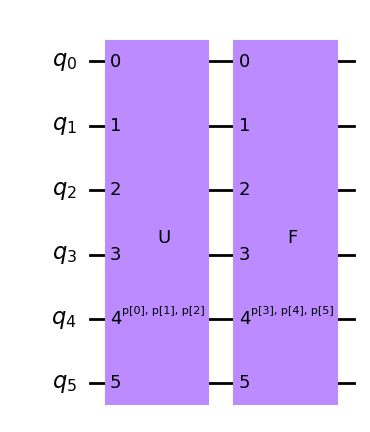

In [12]:
qcnn_without_qubits = qcnn_feature_map()

z = ParameterVector("z", 8)
convolution_gate = QuantumCircuit(6)
convolution_gate.crx(z[0],0,1)
convolution_gate.cry(z[1],1,0)
convolution_gate.crz(z[2],0,1)
qcnn_without_qubits.convolution(convolution_gate, var_param=True,entangled=False,closed=True) 

x = ParameterVector("x", 3)
fully_gate = QuantumCircuit(6)
fully_gate.crx(x[0],0,1)
fully_gate.crx(x[2],0,2)
fully_gate.crx(x[1],1,3)
qcnn_without_qubits.fully_connected(fully_gate)


qcnn_param_vec = ParameterVector("p", qcnn_without_qubits.num_parameters)
qcnn_without_qubits.get_circuit([],qcnn_param_vec).draw()

p, ['p[0]', 'p[1]', 'p[2]', 'p[3]', 'p[4]', 'p[5]', 'p[6]', 'p[7]', 'p[8]', 'p[9]', 'p[10]', 'p[11]', 'p[12]', 'p[13]']
True
[ParameterVectorElement(p[0]), ParameterVectorElement(p[1]), ParameterVectorElement(p[2]), ParameterVectorElement(p[3]), ParameterVectorElement(p[4]), ParameterVectorElement(p[5]), ParameterVectorElement(p[6]), ParameterVectorElement(p[7])]
is operationclosed: True


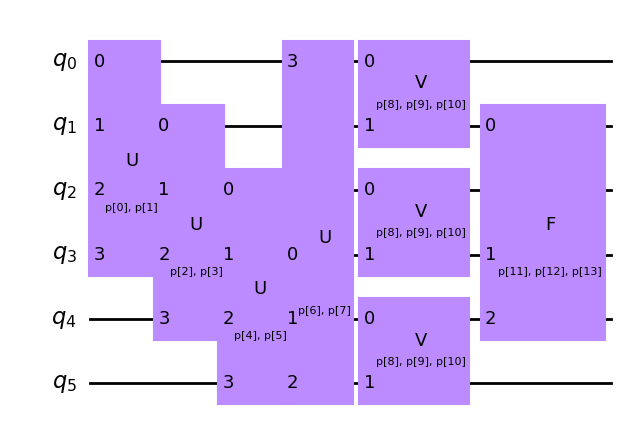

In [3]:
# Tests ohne Vorgabe der Anzahl der Qubits:

qcnn_without_qubits = qcnn_feature_map()


z = ParameterVector("z", 8)
convolution_gate = QuantumCircuit(4)
convolution_gate.crx(z[0],0,1)
convolution_gate.cry(z[1],2,0)
qcnn_without_qubits.convolution(convolution_gate, var_param=True,entangled=True,closed=True)


y = ParameterVector("y",6)
pooling_gate = QuantumCircuit(2)
pooling_gate.cry(y[0],0,1)
pooling_gate.crz(y[1],1,0)
pooling_gate.cry(y[2],1,0)
qcnn_without_qubits.pooling(pooling_gate,var_param=False) #TODO: var_param funktioniert noch nicht
#qcnn_without_qubits.pooling(pooling_gate,var_param=False)



x = ParameterVector("x", 3)
fully_gate = QuantumCircuit(3)
fully_gate.crx(x[0],0,1)
fully_gate.crx(x[2],0,2)
fully_gate.crx(x[1],1,2)
qcnn_without_qubits.fully_connected(fully_gate)

qcnn_param_vec = ParameterVector("p", qcnn_without_qubits.num_parameters)
print(qcnn_param_vec)
qcnn_without_qubits.get_circuit([],qcnn_param_vec).draw()

---------------------
halloooo
###########################
halloooo


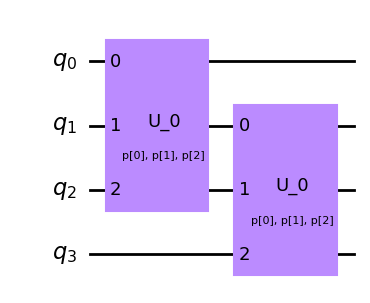

In [4]:
# Test mit Vorgabe der Qubits
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np


qcnn_with_qubits = qcnn_feature_map(4)

x = ParameterVector("x",3)
convolution_gate = QuantumCircuit(3)
convolution_gate.crx(x[0],0,1)
convolution_gate.crx(x[1],0,2)
convolution_gate.crx(x[2],2,0)
qcnn_with_qubits.convolution(convolution_gate,entangled=True)

param_vec = ParameterVector("p",qcnn_with_qubits.num_parameters)
qcnn_with_qubits.get_circuit([],param_vec).draw()

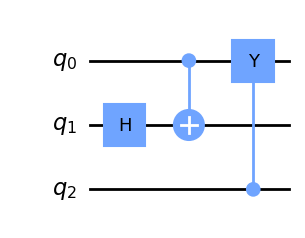

In [5]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

circuit_right_side = QuantumCircuit(3)
circuit_right_side.h(1)
circuit_right_side.cx(0,1)
circuit_right_side.cy(2,0)

circuit_right_side.draw()

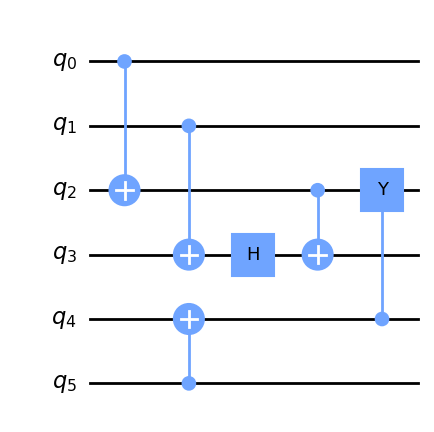

In [6]:
circuit_left_side = QuantumCircuit(6)
circuit_left_side.cx(0,2)
circuit_left_side.cx(1,3)
circuit_left_side.cx(5,4)

QC = circuit_left_side.compose(circuit_right_side,[2,3,4])
QC.draw()